# <font color='blue'>Lab 7 - CCPS 844 Data Mining</font>
# <font color='green'>Salman AlMaskati</font>
### <font color='red'> Answer the following questions and submit a PDF file on the D2L.</font>


**Select a dataset or datasets of your choice.**
* Apply Cross-validation for parameter tuning, model selection, & feature selection like “cross_validation.ipynb”.
* Apply a classification algorithm and then evaluate the classification model as it is done in “classification_model_evaluation.ipynb”.
* Apply simple linear or multivariate linear regression and then evaluate it as it is done in “regression_model_Evaluation.ipynb”.

## 1A - Cross-validation: parameter tuning

In [253]:
import pandas as pd
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [254]:
df=pd.read_csv('pima-indians-diabetes.csv',index_col=0)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [255]:
features = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']
X=df[features]
y=df.label
X


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
5,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63
765,2,122,70,27,0,36.8,0.340,27
766,5,121,72,23,112,26.2,0.245,30
767,1,126,60,0,0,30.1,0.349,47


In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7604166666666666


In [257]:
from sklearn.model_selection import KFold

example3 = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
kf = KFold(n_splits=5,shuffle=True)
print('{} {:^61} {}'.format('Iteration', 'Train observations indices', 'Test observations indices'))
i = 1
for train_index, test_index in kf.split(example3):
    print(f'{i:^9}', train_index, test_index);i+=1

Iteration                  Train observations indices                   Test observations indices
    1     [ 1  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23 24] [ 0  2  5 12 13]
    2     [ 0  1  2  3  5  7  9 10 11 12 13 14 15 16 17 18 19 21 23 24] [ 4  6  8 20 22]
    3     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 17 18 20 21 22 23] [14 15 16 19 24]
    4     [ 0  2  3  4  5  6  7  8  9 12 13 14 15 16 18 19 20 22 23 24] [ 1 10 11 17 21]
    5     [ 0  1  2  4  5  6  8 10 11 12 13 14 15 16 17 19 20 21 22 24] [ 3  7  9 18 23]


In [258]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.68831169 0.77922078 0.74025974 0.66233766 0.71428571 0.75324675
 0.71428571 0.80519481 0.73684211 0.76315789]


In [259]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())    
print(k_scores)


[0.6796650717703349, 0.7122351332877648, 0.7030587833219413, 0.7187115516062884, 0.7213773069036227, 0.7357142857142858, 0.7396274777853726, 0.7383116883116883, 0.7383458646616542, 0.7434723171565277, 0.7369446343130555, 0.7473684210526316, 0.7422077922077922, 0.7539131920710869, 0.7448051948051948, 0.7526144907723855, 0.7552973342447027, 0.7552802460697198, 0.7474709501025291, 0.7461893369788107, 0.7500683526999316, 0.7501196172248804, 0.7475222146274778, 0.7435919343814081, 0.7462064251537937, 0.7331681476418319, 0.7370813397129188, 0.7305365686944635, 0.7318523581681476, 0.7253588516746412]


Text(0, 0.5, 'Cross-Validated Accuracy')

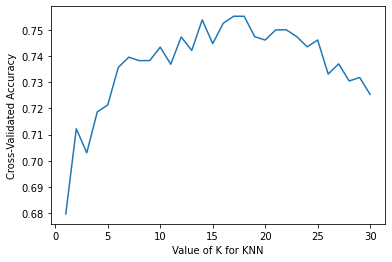

In [260]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## 1B - Cross-validation: Model Selection

In [261]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7461893369788107


In [262]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression( solver='liblinear', multi_class='auto')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.7669685577580314


## 1C - Cross-validation: Feature Selection

In [263]:
from sklearn.linear_model import LinearRegression
import numpy as np

lm = LinearRegression()
mse_scores = cross_val_score(lm, X, y, cv=10, scoring= 'neg_mean_squared_error')
mse_scores= -mse_scores
print("MSE Scores all features:",mse_scores)

#RMSE
rmse_scores = np.sqrt(mse_scores)
print("RMSE Scores all features:",rmse_scores)
print("RMSE Mean all features:",rmse_scores.mean())

#new feature column (remmove 'glucose', 'bp', 'skin','pedigree')
new_feature=['pregnant','insulin','bmi','age']

print("RMSE (remove 'glucose', 'bp', 'skin','pedigree'):",np.sqrt(-cross_val_score(lm, X[new_feature], y, cv=10, scoring='neg_mean_squared_error')).mean())

MSE Scores all features: [0.20449319 0.13855495 0.17842096 0.1797556  0.17059818 0.16068093
 0.15263222 0.11996205 0.15652963 0.16649737]
RMSE Scores all features: [0.45220923 0.37222969 0.42239905 0.42397594 0.41303532 0.40085026
 0.39068174 0.34635538 0.39563826 0.40804089]
RMSE Mean all features: 0.4025415762556528
RMSE (remove 'glucose', 'bp', 'skin','pedigree'): 0.44016290843995665


## 2- Classification algorithm

In [264]:
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1]
Pred: [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [265]:
print(metrics.confusion_matrix(y_test, y_pred))

[[110  16]
 [ 30  36]]


In [266]:
# save confusion matrix and slice into four pieces
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[110  16]
 [ 30  36]]
True Positive:  36
True Negative:  110
False Positive:  16
False Negative:  30


In [267]:
print("Accuracy: ",(TP + TN) / float(TP + TN + FP + FN))
print("Misclassification Rate: ",(FP + FN) / float(TP + TN + FP + FN))
print("Recall: ",TP / float(TP + FN))
print("Specificity: ",TN / float(TN + FP))
print("False Positive Rate: ",FP / float(TN + FP))
print("Percision",TP / float(TP + FP))


Accuracy:  0.7604166666666666
Misclassification Rate:  0.23958333333333334
Recall:  0.5454545454545454
Specificity:  0.873015873015873
False Positive Rate:  0.12698412698412698
Percision 0.6923076923076923


In [268]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 14

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Text(0, 0.5, 'Frequency')

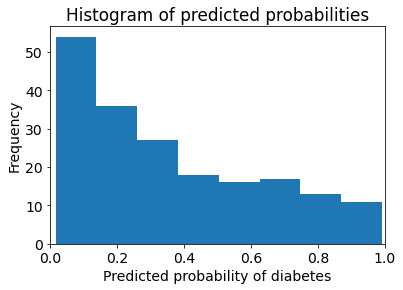

In [ ]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [ ]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [ ]:

print("Threshold 0.5:\n ",confusion_matrix)
print("Threshold 0.3:\n ",metrics.confusion_matrix(y_test, y_pred_class))

Threshold 0.5:
  [[110  16]
 [ 30  36]]
Threshold 0.3:
  [[82 44]
 [12 54]]


In [ ]:
print("Recall Threshold 0.5: ",TP / float(TP + FN))
print("Recall Threshold 0.3: ", 82 / float(82+12) )
print("Recall increased" )
print("\n")
print("Specificity Threshold 0.5: ",TN / float(TN + FP))
print("Specificity Threshold 0.3: ", 54/ float(54 + 44))
print("Specificity decreased")


Recall Threshold 0.5:  0.5454545454545454
Recall Threshold 0.3:  0.8723404255319149
Recall increased


Specificity Threshold 0.5:  0.873015873015873
Specificity Threshold 0.3:  0.5510204081632653
Specificity decreased


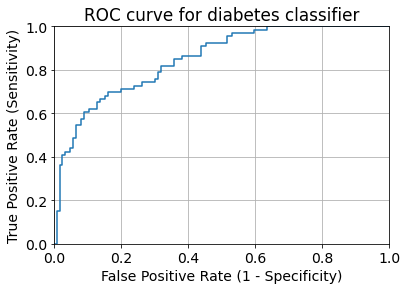

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.6515151515151515
Specificity: 0.873015873015873


In [ ]:
evaluate_threshold(0.3)

Sensitivity: 0.8181818181818182
Specificity: 0.6825396825396826


## 3- Regression Model

In [ ]:
import seaborn as sns
%matplotlib inline

df=pd.read_csv("Advertising.csv",index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


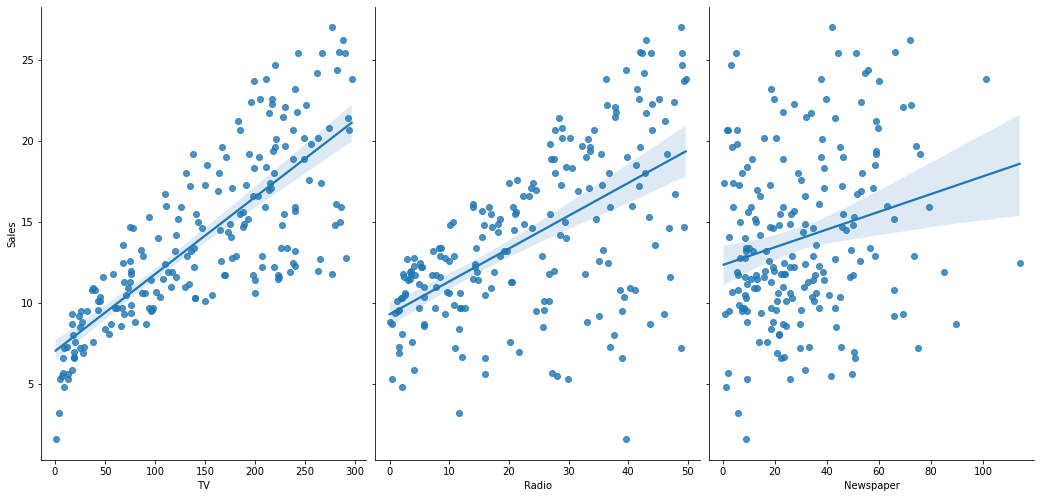

In [ ]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [ ]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']
X

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
list(zip(df[['TV','Radio','Newspaper']], linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
print('Mean Absoulute Error',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absoulute Error 1.0668917082595206
Mean Squared Error: 1.9730456202283368
Root Mean Squared Error:  1.404651423032895
